In [1]:
import h5py
from matplotlib import pyplot
%matplotlib inline
import numpy as np

In [2]:
pyplot.rcParams['figure.figsize'] = (10, 6)
pyplot.rcParams['font.size'] = 14

In [3]:
def k31_RFT14(z):
    k31 = np.zeros_like(z)
    k31[z > 50] = 0.
    logJ = -23.56688 + 4.56213e-1 * (1.0+z) - \
            2.67982e-2 * np.power(1.0+z, 2.0) + \
            5.88234e-4 * np.power(1.0+z, 3.0) - \
            5.05576e-6 * np.power(1.0+z, 4.0)
    fil = (z <= 50) & (z > 6)
    k31[fil] = 1.13e8 * np.power(10.0, logJ[fil])
    k31[z <= 6] = 1.13e8 * 1.0e-21
    return k31

In [4]:
def interpvals(xtab, ytab, x, log=True):
    i = np.digitize(x, xtab) - 1
    i = np.clip(i, 0, xtab.size-2)
    if log:
        m = np.log10(ytab[i+1] / ytab[i]) / np.log10(xtab[i+1] / xtab[i])
        return np.power(10, m * np.log10(x / xtab[i]) + np.log10(ytab[i]))
    else:
        m = (ytab[i+1] - ytab[i]) / (xtab[i+1] - xtab[i])
        return m * (x - xtab[i]) + ytab[i]

In [5]:
def load_rates(filename, group, rates, zero_val=1e-50):
    print ("Loading rates from %s: %s" % (filename, rates))
    data = {}
    fh = h5py.File(filename, 'r')
    g = fh['UVBRates']
    data['z'] = g['z'].value
    for rate in rates:
        data[rate] = g[group][rate].value
        data[rate] = np.clip(data[rate], 1e-50, np.inf)
    fh.close()
    return data

In [6]:
def plot_rates(z, filenames, group, rates):
    pyplot.xscale('log')
    pyplot.yscale('log')
    lss = ['-', '--', ':']
    cmap = pyplot.cm.jet
    tdata = dict((filename, load_rates(filename, group, rates))
                 for filename in filenames)
    for ir, rate in enumerate(rates):
        for ifn, fn in enumerate(filenames):
            ztab = tdata[fn]['z']
            my_rate = interpvals(ztab+1, tdata[fn][rate], z+1)
            if ifn == 0:
                label = rate
            else:
                label = None
            pyplot.plot(z+1, my_rate, linestyle=lss[ifn],
                        color=cmap((ir+1)/len(rates)),
                        label=label)
    pyplot.xlim(z[0]+1, z[-1]+1)
    pyplot.xlabel('z+1')
    pyplot.ylabel('rates [CGS]')
    pyplot.legend(loc='best')

# Regular tables

## Solid lines are original tables, dashed lines are the new tables.

Loading rates from CloudyData_UVB=HM2012.h5: ['k24', 'k25', 'k26', 'k29', 'k30']
Loading rates from CloudyData_HM2012_highz.h5: ['k24', 'k25', 'k26', 'k29', 'k30']


(1e-29, 1e-11)

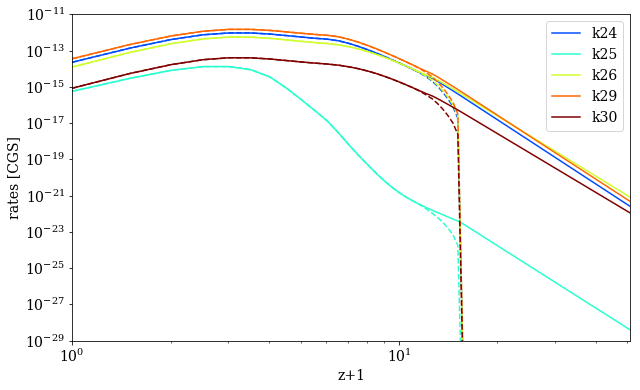

In [7]:
z = np.linspace(0, 50, 100)
plot_rates(z, ['CloudyData_UVB=HM2012.h5',
               'CloudyData_HM2012_highz.h5'],
           'Chemistry', ['k24', 'k25', 'k26', 'k29', 'k30'])
pyplot.ylim(1e-29, 1e-11)

Loading rates from CloudyData_UVB=HM2012.h5: ['piHI', 'piHeI', 'piHeII']
Loading rates from CloudyData_HM2012_highz.h5: ['piHI', 'piHeI', 'piHeII']


(1e-26, 1e-11)

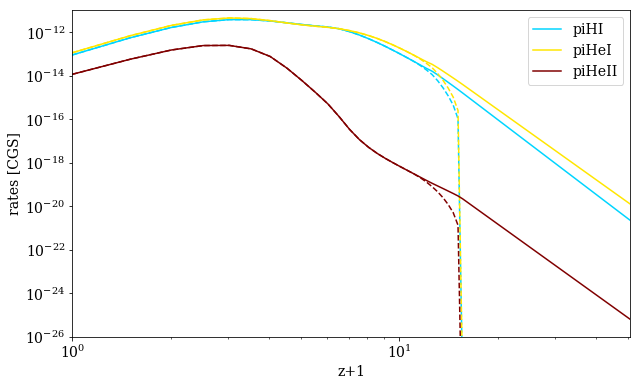

In [8]:
z = np.linspace(0, 50, 100)
plot_rates(z, ['CloudyData_UVB=HM2012.h5',
               'CloudyData_HM2012_highz.h5'],
           'Photoheating', ['piHI', 'piHeI', 'piHeII'])
pyplot.ylim(1e-26, 1e-11)

Loading rates from CloudyData_UVB=HM2012.h5: ['k27', 'k28', 'k31']
Loading rates from CloudyData_HM2012_highz.h5: ['k27', 'k28', 'k31']


(1e-19, 1e-07)

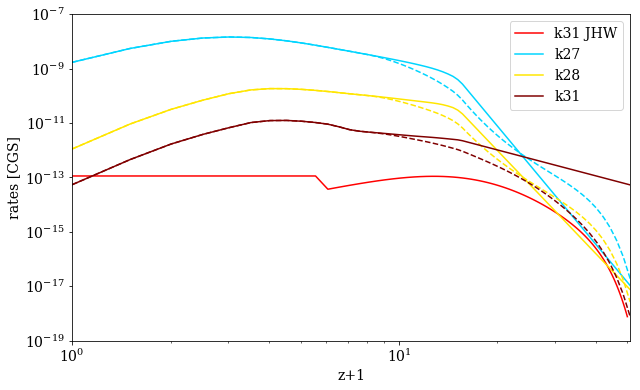

In [9]:
z = np.linspace(0, 50, 100)
pyplot.plot(z, k31_RFT14(z), color='red', label='k31 JHW')
plot_rates(z, ['CloudyData_UVB=HM2012.h5',
               'CloudyData_HM2012_highz.h5'],
           'Chemistry', ['k27', 'k28', 'k31'])
pyplot.ylim(1e-19, 1e-7)

# Self-shielded tables

## Solid lines are original tables, dashed lines are the new tables.

Loading rates from CloudyData_UVB=HM2012_shielded.h5: ['k24', 'k25', 'k26', 'k29', 'k30']
Loading rates from CloudyData_HM2012_highz_shielded.h5: ['k24', 'k25', 'k26', 'k29', 'k30']


(1e-29, 1e-11)

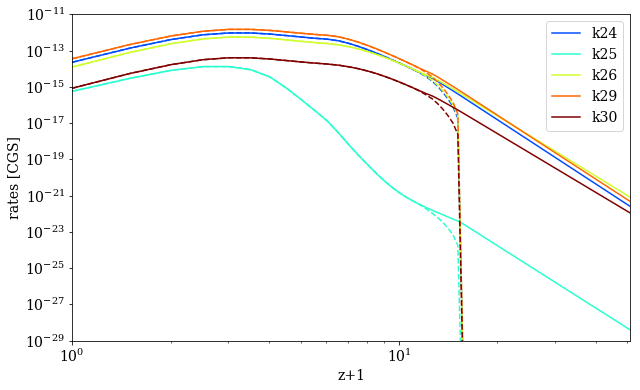

In [10]:
z = np.linspace(0, 50, 100)
plot_rates(z, ['CloudyData_UVB=HM2012_shielded.h5',
               'CloudyData_HM2012_highz_shielded.h5'],
           'Chemistry', ['k24', 'k25', 'k26', 'k29', 'k30'])
pyplot.ylim(1e-29, 1e-11)

Loading rates from CloudyData_UVB=HM2012_shielded.h5: ['piHI', 'piHeI', 'piHeII']
Loading rates from CloudyData_HM2012_highz_shielded.h5: ['piHI', 'piHeI', 'piHeII']


(1e-26, 1e-11)

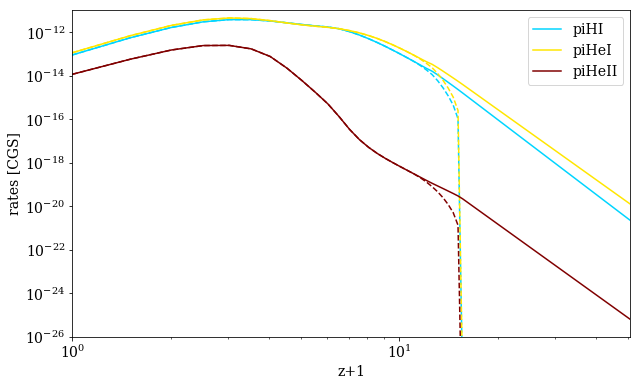

In [11]:
z = np.linspace(0, 50, 100)
plot_rates(z, ['CloudyData_UVB=HM2012_shielded.h5',
               'CloudyData_HM2012_highz_shielded.h5'],
           'Photoheating', ['piHI', 'piHeI', 'piHeII'])
pyplot.ylim(1e-26, 1e-11)

Loading rates from CloudyData_UVB=HM2012_shielded.h5: ['k27', 'k28', 'k31']
Loading rates from CloudyData_HM2012_highz_shielded.h5: ['k27', 'k28', 'k31']


(1e-19, 1e-07)

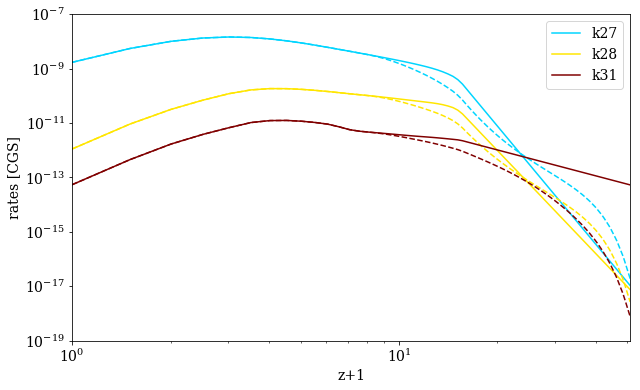

In [12]:
z = np.linspace(0, 50, 100)
plot_rates(z, ['CloudyData_UVB=HM2012_shielded.h5',
               'CloudyData_HM2012_highz_shielded.h5'],
           'Chemistry', ['k27', 'k28', 'k31'])
pyplot.ylim(1e-19, 1e-7)